# Exercise 2 - Effects of Sampling (45 mins)

## Objectives
- To understand the effects of sampling in the time and frequency domains 
- To understand why sampling might cause aliasing 

## Video ([Backup Link](https://www.youtube.com/watch?v=XQllBh3W21E))

In [3]:
# Embed Youtube video
from IPython.display import HTML 
HTML('''<script> code_show=true;function code_toggle() {if (code_show){$('.cm-comment:contains(@hidden)').closest('div.input').hide();} else {$('.cm-comment:contains(@hidden)').closest('div.input').show();}code_show = !code_show} $( document ).ready(code_toggle);</script><center><iframe width="560" height="315" src="https://www.youtube.com/embed/XQllBh3W21E?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe></center>''') # @hidden

## Lab Exercise
Let us start by thinking about the sampling process in the time domain as shown in Fig. 2.1. It may be interpreted as the multiplication between a continuous-time domain signal $x(t)$ and a train of impulses $s(t)$.

<img src="img/ex2_1.svg" alt="drawing" width="900" style = "background-color:white" />
<center>Figure 2.1: The sampling process of an continuous-time signal</center>

Observe that $x_s(t) = x(t)\times s(t) = \sum_n x(nT)\delta(t-nT),$ where $-\infty < n < \infty$ and $T=1/f_s$. This is still a continuous-time signal (variable $t$) which are zero-valued for $t \neq nT$ and should not be confused with the discrete-time signal $x[n]$, which comprises the signal amplitudes at the sampling instances and only exists for $n=0,1,2,\cdots$.

Now think about $x(t)$ and $s(t)$ and their frequency domain representations which are shown in Fig. 2.2. 

<img src="img/ex2_2.svg" alt="drawing" style = "background-color:white" width="900"/>
<center>Figure 2.2: Frequency domain representation of x(t) and  s(t) </center>


You may recall that multiplication in the time domain is equivalent to convolution in the frequency domain. Therefore, the dual of $x_s(t) =x(t) \times s(t)$ in the time domain is $X_s(j\omega) = X(j\omega) * S(j\omega)$ in the frequency domain, where '$*$' denotes the linear convolution. 

Thus, $X_s(j\omega)$ is a periodic function of frequency $\omega$, consisting of the sum of shifted and scaled replicas of $X(j\omega)$, shifted by integer multiples of $\omega_s$ and scaled by $\frac{1}{T}$. 


<img src="img/ex2_3.svg" alt="drawing" width="900" style = "background-color:white" />
<center>Figure 2.3: A sampled sine wave and its spectrum</center>

### Sampling Theorem 

Sampling, therefore, has the effect of creating spectral images at each and every integer multiple of $\omega_s$. Thus, to avoid corruption of information arising from overlapping spectral images (this distortion is called aliasing), the following condition must be met: 

---
**Definition**:
$$|\omega_m|  < \frac{\omega_s}{2} \: \text{(Nyquist frequency)}, \quad \text{where } \omega_s  =2\pi f_s =2\pi/T_s \quad \implies \quad |\Omega|  < \pi $$

---

The frequency $\omega_s/2$ is called the Nyquist frequency. If $\omega_m$ is the highest frequency component in the signal, then sampling at a rate (frequency) above twice the maximum signal frequency, $\omega_s>|2\omega_m|$, is called *oversampling*. Sampling at a rate below twice this signal frequency, $\omega_s<|2\omega_m|$, is called *undersampling*. Lastly, sampling at a rate exactly twice this maximum signal frequency, $\omega_s=|2\omega_m|$, is called *critical sampling*.

To see aliasing in action, let us generate some more plots using `sinegen` function by setting $N=100$, $ f_s=8000$ Hz and varying:

$ (\text{i}) \:  f=150 $ Hz, $\quad  (\text{ii}) \: f=300 $ Hz, $ \quad (\text{iii}) \: f=600 $ Hz 

$ (\text{iv}) \:  f=7400 $ Hz, $\quad (\text{v}) \:  f=7700 $ Hz  $ (\text{vi}) \:  f=7850 $ Hz

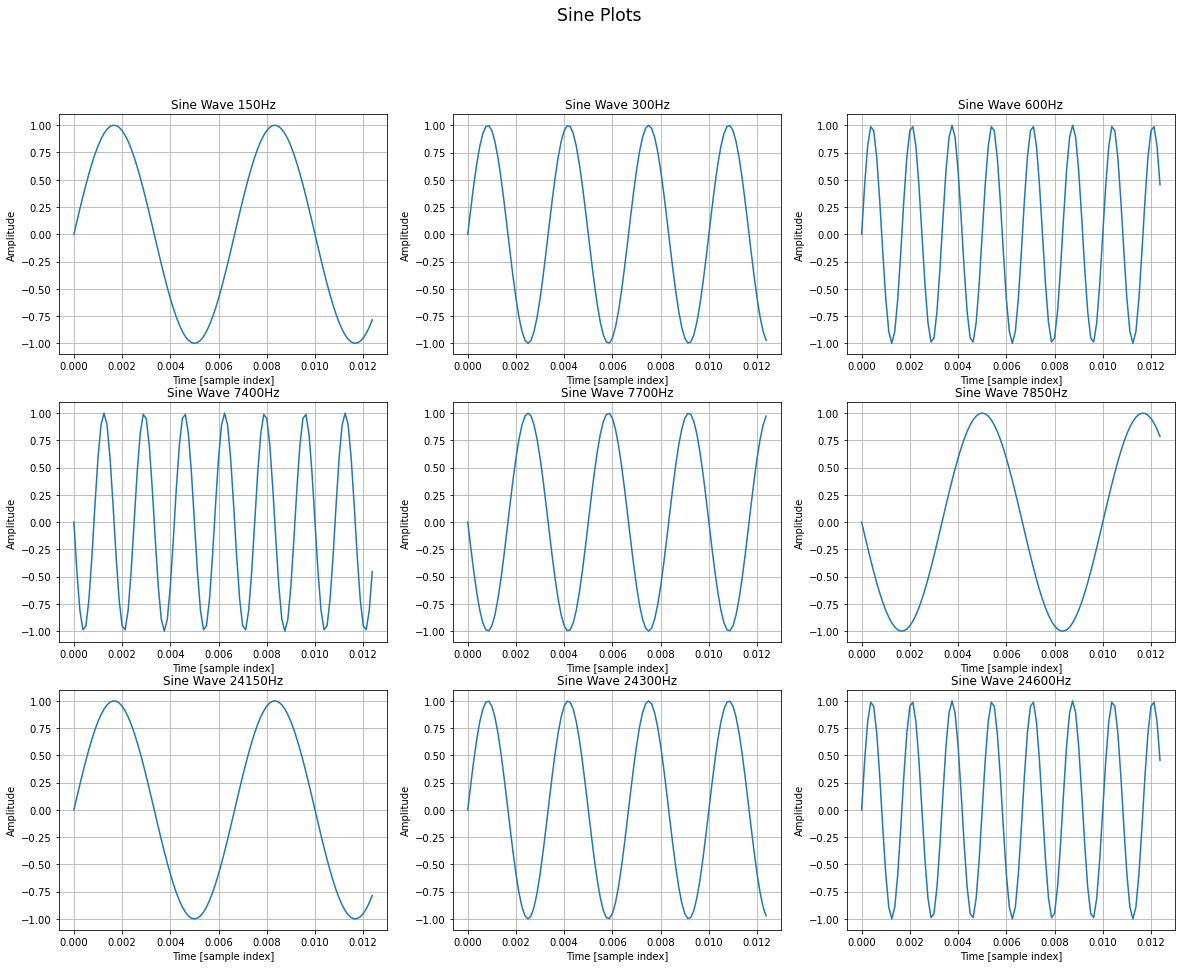

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from functions.lab_functions import sinegen
from functions.lab_functions import plot_signal

def cosgen(fs, fsig, Nsamp):
    tsamp = 1/(fs*np.pi)
    t = np.arange(0, Nsamp*tsamp, tsamp)
    y = np.cos(2*np.pi*fsig*t)
    return t, y

fs = 8000
fsig = 150 # change the value of fsig for parts (i) to (vi)
Nsamp = 100
t, x = sinegen(fs, fsig, Nsamp)

# plt = plot_signal(t, x, title='Sine Wave ' + str(fsig) + 'Hz', xlabel='Time [sample index]', ylabel='Amplitude')
# plt.savefig('results/ex2/ex2_sine_' + str(fsig) + '_hz.pdf')
# plt.show()

rows = 2
cols = 3
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Sine Plots', fontsize='xx-large')
for i, freq in enumerate([150,300,600,7400,7700,7850, 24150, 24300, 24600]):
    t, x = sinegen(fs, freq, Nsamp)
    axes[i//cols, i % cols].plot(t, x)
    axes[i//cols, i % cols].set_title('Sine Wave ' + str(freq) + 'Hz')
    axes[i//cols, i % cols].set_xlabel('Time [sample index]')
    axes[i//cols, i % cols].set_ylabel('Amplitude')
    axes[i//cols, i % cols].grid()
    axes[i//cols, i % cols].plot


plt.show()


The plots created above (e.g. `ex2_sine_150_hz.pdf`) will have also been saved to the `/results/ex2/` folder so you now have a record of all the plots.

**Question 2.1**: Describe and discuss the results for (i)-(iii) and (iv)-(vi).

Aliasing at 7400Hz and higher as they exceed the 4000Hz limit.
Interestingly to note, the 150Hz and 7850Hz waves are in antiphase, along with the 600Hz and 7400Hz, the 300Hz and 7700Hz. They are complements to the 8000Hz sampling frequency

**Question 2.2**: Predict the results for frequencies $ f=24150$ Hz, $ \: f=24300$ Hz and $ \: f=24600$ Hz and confirm your prediction with Python.

Should be the same as 150Hz, 300Hz, and the 600Hz waves as they are in the same phase, just 3 cycles (8000*3 =24000) ahead

**Question 2.3**: Consider $x(t)=\cos(100\pi t)$

$\quad$(a) Determine the minimum sampling rate to avoid aliasing.
$\quad$ 50Hz, so minimum sampling rate should be 100Hz.

$\quad$(b) Write down an expression for $x[n]$ if a sampling frequency of 200Hz is used.
$\quad$ Each step is $ \frac{1}{200} $ seconds. 
$$ x[n]=\cos(\frac{100\pi}{200}n) \Rightarrow \cos(\frac{\pi}{2}n) $$

$\quad$(c) Write down an expression for $x[n]$ if a sampling frequency of 75Hz is used.
$\quad$ Each step is $ \frac{1}{75} $ seconds.
$$ x[n]=\cos(\frac{100\pi}{75}n) \Rightarrow \cos(\frac{4\pi}{3}n) $$


**Question 2.4**: If the sampling frequency is 48 kHz, what is the normalised angular frequency of the discrete-time signal corresponding to a sinusoid at 1.2 kHz?

A sinusoid at 1.2kHz can be written as $ \sin(2400\pi) $. So the normalised angular frequency is $ {\omega} = \frac{2400\pi}{48000} = 0.15707 \text{ radians/second}$


**Question 2.5**: Given a signal with a normalised angular frequency of $\frac{\pi}{4}$, what is its frequency expressed in terms of the sampling frequency, $f_s$?

$ \frac{\pi}{4} = \frac{2\pi f}{f_s} \Rightarrow f = \frac{f_s}{8} $

In [20]:
# ## UNRELATED EXPERIMENTAL CODE FOR SOMETHING ELSE

# t = np.linspace(-2, 4, 1000)
# def x(t): return np.exp(-t)*(t >= 0).astype(float)


# def showTimeInvariance(Tr):
#     plt.subplot(121)
#     plt.plot(t, x(t), label='$x(t)$')
#     plt.plot(t, x(t-0.5), label=r'$x(t-\frac{1}{2})$')
#     plt.plot(t, x(t-1), label=r'$x(t-1)$')

#     plt.subplot(122)
#     y1 = Tr(x)
#     y2 = Tr(lambda t: x(t-0.5))
#     y3 = Tr(lambda t: x(t-1))
#     plt.plot(t, y1(t), label=r'$Tr\{x(t)\}$')
#     plt.plot(t, y2(t), label=r'$Tr\{x(t-\frac{1}{2})\}$')
#     plt.plot(t, y3(t), label=r'$Tr\{x(t-1)\}$')



# def Tr(x):
#     return lambda t: x(t+1)-10*x(t-3)


# showTimeInvariance(Tr)
